In [95]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models, losses

In [96]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [97]:
x_train.shape

(60000, 28, 28)

In [98]:
def display_image(position):
    image = x_train[position]
    plt.title('Example %d. Label: %d' % (position, y_train[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

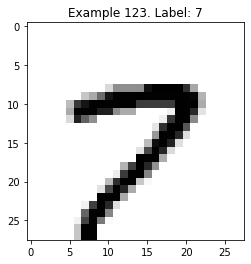

In [99]:
display_image(123) 

In [100]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255 
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [101]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [103]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [104]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_4 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_5 (Activation)   (None, 5, 5, 16)         

In [105]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [106]:
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/20
875/875 [==============================] - 6s 5ms/step - loss: 1.8705 - accuracy: 0.3013 - val_loss: 0.4490 - val_accuracy: 0.8635
Epoch 2/20
875/875 [==============================] - 5s 5ms/step - loss: 0.3747 - accuracy: 0.8817 - val_loss: 0.2560 - val_accuracy: 0.9205
Epoch 3/20
875/875 [==============================] - 4s 5ms/step - loss: 0.2718 - accuracy: 0.9151 - val_loss: 0.2081 - val_accuracy: 0.9320
Epoch 4/20
875/875 [==============================] - 4s 5ms/step - loss: 0.2277 - accuracy: 0.9287 - val_loss: 0.1831 - val_accuracy: 0.9405
Epoch 5/20
875/875 [==============================] - 5s 6ms/step - loss: 0.2038 - accuracy: 0.9349 - val_loss: 0.1942 - val_accuracy: 0.9375
Epoch 6/20
875/875 [==============================] - 5s 6ms/step - loss: 0.1820 - accuracy: 0.9421 - val_loss: 0.1380 - val_accuracy: 0.9550
Epoch 7/20
875/875 [==============================] - 5s 5ms/step - loss: 0.1633 - accuracy: 0.9475 - val_loss: 0.1539 - val_accuracy: 0.9520
Epoch 

KeyboardInterrupt: ignored

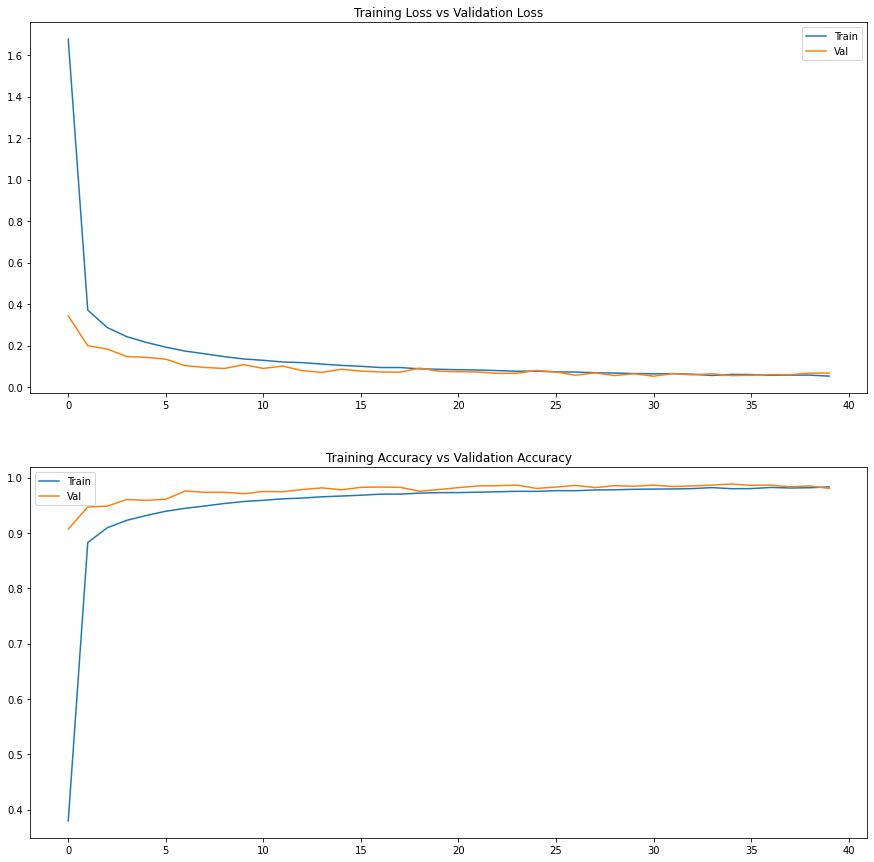

In [107]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])


In [108]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0860 - accuracy: 0.9728


[0.0859694704413414, 0.9728000164031982]

In [109]:
y_predict = model.predict(x_test)
y_predict[3]

313/313 [==============================] - 1s 2ms/step


array([9.9945945e-01, 5.5686058e-08, 1.9145335e-04, 5.0700731e-07,
       2.1366313e-06, 8.2583356e-06, 6.8115165e-05, 3.6930285e-06,
       5.0826043e-06, 2.6132559e-04], dtype=float32)

In [110]:
y_predict_classes = np.argmax(y_predict, axis=1)
y_predict_classes[3]

0

In [111]:
def display_predictions(position):
    image = x_test[position]
    plt.title('test set %d. predict Label: %d' % (position, y_predict_classes[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

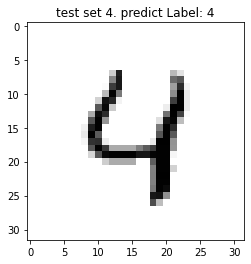

In [116]:
display_predictions(4)